In [367]:
import numpy as np
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [368]:
import warnings
warnings.filterwarnings('ignore')

# Import Data
- import engineered dataset
- encode categorical features
- create scoring function
- perform train-test split

In [369]:
homes_raw = pd.read_csv('../akram/1 - EDA/df_engineered.csv', index_col=0)
prices = homes_raw.SalePrice
logprices = homes_raw.logSalePrice

homes_raw.head()

,PID,DateSold,SalePrice,logSalePrice,Rate,LotArea,GrLivArea,Neighborhood,Neighborhood_Int,Age,RemodSinceBuilt,StreetAlley,LotShape,LandContour,LandSlope,LotConfig,IsOnMainroad,IsNearRailroad,IsNearPark,MSSubClass,MSZoning,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,IsPUD,NumFloors,Collapse_MSSubClass,Combine_BathroomsBsmt,Combine_BathroomsAbvGrd,AllBathrooms,Combine_Age,IsRenovated
1,904302020,2006-01-01,80000,4.903090,4.4106,5220,879,SWISU,6,70,14,1,1,1,0,1,0,0,0,Dwelling_30,RL,1Fam,1Story,5,3,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,3,1,1,0,1,0,830,830,GasA,4,Y,SBrkr,879,0,0,0,0,1,0,2,1,3,4,8,0,0,Detchd,1936,Unf,1,180,3,3,2,0,108,0,0,0,0,0,NoFence,NoMisc,0,WD,Normal,False,1.0,Traditional,0.0,1.0,1.0,56,True
2,532378050,2006-01-01,120875,5.082336,4.4106,13052,1024,Sawyer,8,41,0,1,1,1,0,4,0,0,0,Dwelling_20,RL,1Fam,1Story,5,6,Gable,CompShg,HdBoard,HdBoard,None,0,3,3,CBlock,3,3,1,3,712,1,0,312,1024,GasA,3,Y,SBrkr,1024,0,0,0,0,1,1,3,1,3,5,8,0,0,Attchd,1965,Unf,1,308,3,3,3,0,0,0,0,0,0,0,MnPrv,NoMisc,0,WD,Normal,False,1.0,Traditional,0.0,1.5,1.5,41,False
3,534275010,2006-01-01,136500,5.135133,4.4106,10659,1050,NAmes,11,45,0,1,1,1,0,1,0,0,0,Dwelling_20,RL,1Fam,1Story,5,6,Hip,CompShg,Wd Sdng,Wd Sdng,None,0,3,3,CBlock,3,3,1,3,915,1,0,135,1050,GasA,3,Y,SBrkr,1050,0,0,1,0,1,0,3,1,3,6,8,0,0,Attchd,1961,Unf,1,368,3,3,3,0,319,0,0,0,0,0,NoFence,NoMisc,0,COD,Normal,False,1.0,Traditional,1.0,1.0,2.0,45,False
4,531363080,2006-01-01,139500,5.144574,4.4106,7733,1142,SawyerW,13,1,0,1,1,1,0,1,0,0,0,Dwelling_20,RL,1Fam,1Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,PConc,3,3,2,6,24,1,0,1118,1142,GasA,5,Y,SBrkr,1142,0,0,0,0,1,1,3,1,4,5,8,0,0,NoGarage,2005,NoGarage,0,0,0,0,3,4,50,0,0,0,0,0,NoFence,NoMisc,0,WD,Normal,False,1.0,Traditional,0.0,1.5,1.5,1,False
5,535304020,2006-01-01,139500,5.144574,4.4106,12778,1008,NAmes,11,54,51,1,0,1,0,1,0,0,0,Dwelling_20,RL,1Fam,1Story,5,6,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,3,3,1,6,658,1,0,350,1008,GasA,5,Y,FuseA,1008,0,0,1,0,1,0,2,1,3,4,8,0,0,Attchd,1952,RFn,1,280,3,3,3,0,154,0,0,0,0,0,MnPrv,NoMisc,0,WD,Normal,False,1.0,Traditional,1.0,1.0,2.0,3,True


In [370]:
#select features used in linear models
features = ['GrLivArea','LotArea','Neighborhood_Int','Age','StreetAlley','RemodSinceBuilt','LotShape','LandContour','LandSlope','LotConfig',
            'IsOnMainroad','IsNearPark','IsNearRailroad','BsmtQual','RoofStyle','OverallQual','OverallCond','ExterQual','Exterior1st','BsmtExposure','Rate',
            'BldgType','MSZoning','Foundation','TotalBsmtSF','Heating','KitchenQual','Fireplaces','GarageQual','GarageCond','GarageFinish','GarageCars','KitchenAbvGr',
            'PavedDrive','EnclosedPorch','SaleCondition','ScreenPorch','HouseStyle','BsmtFullBath','AllBathrooms','FullBath','FireplaceQu','Functional','TotRmsAbvGrd',
            'BedroomAbvGr','HeatingQC','CentralAir']

homes = homes_raw[features]

#label encode categorical features
labelencoder = LabelEncoder()
catfeats = ['RoofStyle','Exterior1st','BldgType','MSZoning','Foundation','Heating','GarageFinish','SaleCondition','HouseStyle','CentralAir']
for i in catfeats:
    homes[i+"_Encoded"] = labelencoder.fit_transform(homes[i])
homes.drop(catfeats,axis=1,inplace=True)

homes.head()


,GrLivArea,LotArea,Neighborhood_Int,Age,StreetAlley,RemodSinceBuilt,LotShape,LandContour,LandSlope,LotConfig,IsOnMainroad,IsNearPark,IsNearRailroad,BsmtQual,OverallQual,OverallCond,ExterQual,BsmtExposure,Rate,TotalBsmtSF,KitchenQual,Fireplaces,GarageQual,GarageCond,GarageCars,KitchenAbvGr,PavedDrive,EnclosedPorch,ScreenPorch,BsmtFullBath,AllBathrooms,FullBath,FireplaceQu,Functional,TotRmsAbvGrd,BedroomAbvGr,HeatingQC,RoofStyle_Encoded,Exterior1st_Encoded,BldgType_Encoded,MSZoning_Encoded,Foundation_Encoded,Heating_Encoded,GarageFinish_Encoded,SaleCondition_Encoded,HouseStyle_Encoded,CentralAir_Encoded
1,879,5220,6,70,1,14,1,1,0,1,0,0,0,3,5,3,3,1,4.4106,830,3,0,3,3,1,1,2,0,0,0,1.0,1,0,8,4,2,4,1,13,0,5,0,1,3,4,2,1
2,1024,13052,8,41,1,0,1,1,0,4,0,0,0,3,5,6,3,1,4.4106,1024,3,0,3,3,1,1,3,0,0,0,1.5,1,0,8,5,3,3,1,6,0,5,1,1,3,4,2,1
3,1050,10659,11,45,1,0,1,1,0,1,0,0,0,3,5,6,3,1,4.4106,1050,3,0,3,3,1,1,3,0,0,1,2.0,1,0,8,6,3,3,3,13,0,5,1,1,3,4,2,1
4,1142,7733,13,1,1,0,1,1,0,1,0,0,0,3,6,5,3,2,4.4106,1142,4,0,0,0,0,1,3,0,0,0,1.5,1,0,8,5,3,5,1,12,0,5,2,1,1,4,2,1
5,1008,12778,11,54,1,51,0,1,0,1,0,0,0,3,5,6,3,1,4.4106,1008,3,0,3,3,1,1,3,0,0,1,2.0,1,0,8,4,2,5,1,8,0,5,1,1,2,4,2,1


In [371]:
#create scoring functions 

def get_score(model):

    model.fit(X_train,Y_train)
    print('Train Accuracy: ', model.score(X_train,Y_train))
    print('Test Accuracy: ', model.score(X_test,Y_test))

def get_score_log(model):

    model.fit(X_train_log,Y_train_log)
    print('Train Accuracy (log): ', model.score(X_train_log,Y_train_log))
    print('Test Accuracy (log): ', model.score(X_test_log,Y_test_log))

In [372]:
#perform train_test split

X_train, X_test, Y_train, Y_test = train_test_split(homes, prices, random_state=0, test_size=0.3)
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(homes, logprices, random_state=0, test_size=0.3)

# Random Forest Modeling

score using default parameters:
- Train: 0.987
- Test:  0.909
- RSME:  0.050
- used logSalePrice as response for better comparison to other models

grid search performed to tune hyperparameters, best params:
- n_estimators = 300
- max_depth = 24
- min_samples_split = 2
- max_features = 21

Accuracy
- Train: 0.986
- Test:  0.915
- RMSE:  0.047
- SalePrice had slightly better score than logSalePrice but was not reported (0.929 test acc - rerun grid search)

In [332]:
forest = RandomForestRegressor()
forest.set_params(random_state=1)

get_score(forest)

Train Accuracy:  0.9868260002547086
Test Accuracy:  0.9095249176252137


In [333]:
get_score_log(forest)

Train Accuracy (log):  0.9847933167016663
Test Accuracy (log):  0.9067069998713699


In [331]:
np.sqrt(mean_squared_error(Y_test_log,forest.predict(X_test_log)))

0.04953317030986244

In [65]:
forest_importances = pd.DataFrame(forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
forest_importances.rename({'index':'Feature',0:'RF_Score'},inplace=True, axis=1)
forest_importances

,Feature,RF_Score
14,OverallQual,0.514445
0,GrLivArea,0.118984
19,TotalBsmtSF,0.100462
2,Neighborhood_Int,0.081268
30,AllBathrooms,0.052235
1,LotArea,0.018987
24,GarageCars,0.011601
13,BsmtQual,0.009865
3,Age,0.009107
28,ScreenPorch,0.007653


Very slight difference between SalePrice and logSalePrice. Will use SalePrice for hyperparameter tuning.

In [334]:
grid_para_forest = [{
    'n_estimators' : range(100,400,50),
    'criterion' : ['squared_error'],  
    'max_depth' : range(15,25,5),
    'min_samples_split' : range(2,10,2),
    'max_features' : range(15,30,5)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)

%time get_score_log(grid_search_forest)

Train Accuracy (log):  0.9864033563789035
Test Accuracy (log):  0.9157724778328947
CPU times: user 5.59 s, sys: 871 ms, total: 6.46 s
Wall time: 2min 55s


In [335]:
grid_search_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 250}

Grid search had negigible effect on train accuracy but noticable improvement on test. Will attempt to improve further.

In [337]:
grid_para_forest = [{
    'n_estimators' : range(300,400,10),
    'criterion' : ['squared_error'],  
    'max_depth' : range(18,25),
    'min_samples_split' : (2,3,4),
    'max_features' : range(18,22)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score_log(grid_search_forest)

Train Accuracy (log):  0.9862865614501464
Test Accuracy (log):  0.9151326598111833
CPU times: user 21 s, sys: 1.96 s, total: 22.9 s
Wall time: 25min 25s


In [340]:
grid_search_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 24,
 'max_features': 21,
 'min_samples_split': 2,
 'n_estimators': 300}

In [341]:
grid_search_forest.best_score_

0.9033526915767475

In [343]:
np.sqrt(mean_squared_error(Y_test_log,grid_search_forest.predict(X_test_log)))

0.047243481154767945

[Text(0.5, 1.0, 'Random Forest Feature Importances')]

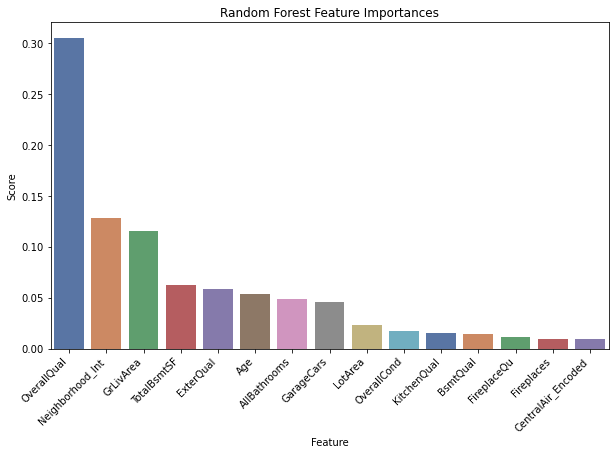

In [346]:
best_forest = grid_search_forest.best_estimator_
best_forest_importances = pd.DataFrame(best_forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
best_forest_importances.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)

plt.rcParams['figure.figsize'] = 10,6
x=sns.barplot(x=best_forest_importances.Feature[:15], y=best_forest_importances.Score,palette='deep')
x.set_xticklabels(x.get_xticklabels(),rotation=45,horizontalalignment='right')
x.set(title='Random Forest Feature Importances')

# Boosted Model

score using default parameters (n_estimators=500):
- Train: 0.989 / 0.985 (logSalePrice)
- Test: 0.928  / 0.920 
- RMSE: 18839 / 0.045 
- note boosted model has worse train but better test accuracy with default params

grid search performed to tune hyperparameters, best params: (both SalePrice and logSalePrice)
- n_estimators = 1000
- learning_rate = 0.0257
- max_depth = 5
- max_features = 25
- subsample = 0.5

best scores:
- Train: 0.996 / 0.994 (logSalePrice)
- Test: 0.939  / 0.927 
- RMSE: 17458 / 0.043 
- reported logSalePrice model for better comparison to other models, despire SalePrice being ~10% better

In [347]:
gbm = GradientBoostingRegressor()
gbm.set_params(random_state=1,n_estimators=500)

get_score(gbm)

Train Accuracy:  0.9891708803499559
Test Accuracy:  0.9284496487723517


In [348]:
np.sqrt(mean_squared_error(Y_test,gbm.predict(X_test)))

18839.927194911957

In [349]:
get_score_log(gbm)

Train Accuracy (log):  0.9854762923515328
Test Accuracy (log):  0.9199090622191098


In [350]:
np.sqrt(mean_squared_error(Y_test_log,gbm.predict(X_test_log)))

0.045894779228075076

In [192]:
gbm_importances = pd.DataFrame(gbm.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
gbm_importances.rename({'index':'Feature',0:'GBM_Score'},inplace=True, axis=1)
gbm_importances

,Feature,GBM_Score
14,OverallQual,0.355381
0,GrLivArea,0.150002
2,Neighborhood_Int,0.144241
19,TotalBsmtSF,0.070688
30,AllBathrooms,0.068090
24,GarageCars,0.036627
20,KitchenQual,0.032733
15,OverallCond,0.028128
1,LotArea,0.018696
46,CentralAir_Encoded,0.012897


## SalePrice
Test accuracy was slightly better using SalePrice - was originally used for hyperparameter tuning.

Upon revisting with group, we will be reporting models using logSalePrice for better comparison and noting difference

In [302]:
grid_para_boost = [{
    # 'loss' : ['squared_error','huber'],  #including huber regression made search take >2hrs, had to kill
    'n_estimators': [500,1000,2000],
    'subsample' : [0.5,0.75,1],
    'criterion' : ['friedman_mse'],  #did not change - documentation said this was generally best
    'max_depth' : range(5,25,10),
    'max_features' : range(15,30,5),
    'learning_rate' : np.linspace(0.001,0.1,5)
}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score(grid_search_boost)

Train Accuracy:  0.9958461821872447
Test Accuracy:  0.9385546630454469
CPU times: user 8 s, sys: 431 ms, total: 8.43 s
Wall time: 17min 47s


In [309]:
grid_search_boost.best_score_

0.9354258628903136

In [303]:
grid_search_boost.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.025750000000000002,
 'max_depth': 5,
 'max_features': 25,
 'n_estimators': 1000,
 'subsample': 0.5}

In [352]:
np.sqrt(mean_squared_error(Y_test,grid_search_boost.predict(X_test)))

17458.93709732175

## logSalePrice

Test accuracy was measurably lower, but same best params

In [354]:
grid_para_boost = [{
    # 'loss' : ['squared_error','huber'],  #including huber regression made search take >3hrs, accidentally killed
    'n_estimators': [500,1000,2000],
    'subsample' : [0.5,0.75,1],
    'criterion' : ['friedman_mse'],  #did not change - documentation said this was generally best
    'max_depth' : range(5,25,10),
    'max_features' : range(15,30,5),
    'learning_rate' : np.linspace(0.001,0.1,5)
}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score_log(grid_search_boost)

Train Accuracy (log):  0.9945560225550474
Test Accuracy (log):  0.9286375882988553
CPU times: user 7.74 s, sys: 676 ms, total: 8.42 s
Wall time: 15min 32s


In [355]:
grid_search_boost.best_score_

0.9273011048684502

In [356]:
grid_search_boost.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.025750000000000002,
 'max_depth': 5,
 'max_features': 25,
 'n_estimators': 1000,
 'subsample': 0.5}

In [357]:
np.sqrt(mean_squared_error(Y_test_log,grid_search_boost.predict(X_test_log)))

0.04332178622697761

[Text(0.5, 1.0, 'Boosted Feature Importances')]

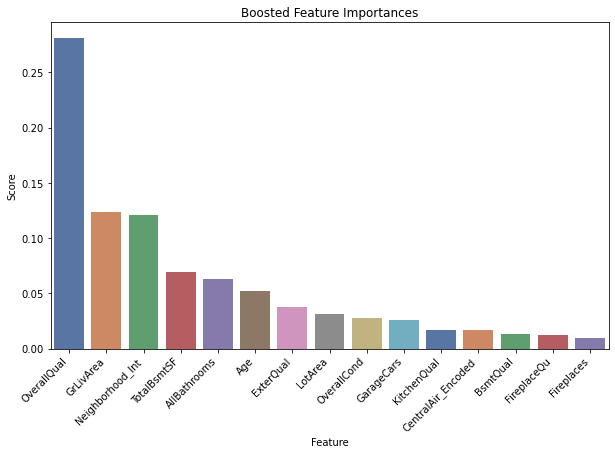

In [358]:
best_boost = grid_search_boost.best_estimator_

best_boost_importances = pd.DataFrame(best_boost.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
best_boost_importances.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
best_boost_importances

plt.rcParams['figure.figsize'] = 10,6
x=sns.barplot(x=best_boost_importances.Feature[:15], y=best_boost_importances.Score,palette='deep')
x.set_xticklabels(x.get_xticklabels(),rotation=45,horizontalalignment='right')
x.set(title='Boosted Feature Importances')

# Plotting Feature Importances

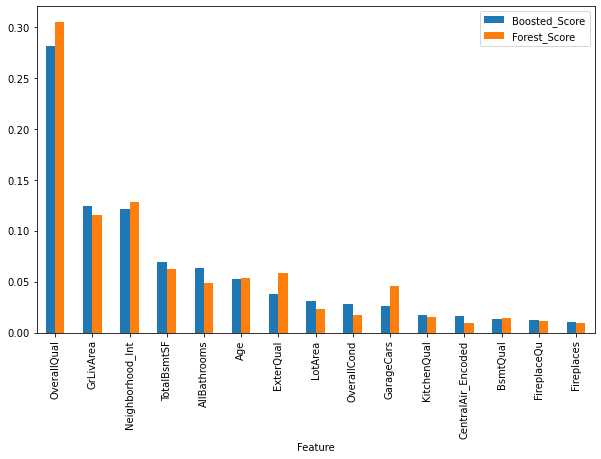

In [361]:
x = best_boost_importances.rename({'Score':'Boosted_Score'},axis=1)
y = best_forest_importances.rename({'Score':'Forest_Score'},axis=1)

plt.rcParams['figure.figsize'] = 10,6
z = pd.merge(x,y,on='Feature')[:15].plot.bar(x='Feature')

# SVR Model

Note: SVR model requires dummification of categorical values. Furthermore, peformance was quite poor (negative accuracy score for SalePrice, ~64% for logSalePrice) prior to standardizing data. 

score using default parameters:
- Train: 0.946
- Test: 0.880
- RMSE: 0.346
- negligible difference between SalePrice and logSalePrice after standardizing and optimizing

grid search performed to tune hyperparameters, best params: (SalePrice)
- C = 37
- gamma= 0.000941

best scores:
- Train: 0.971
- Test:  0.936
- RMSE: 0.256

In [374]:
#dummify variables
import copy as cp

homes_SVR = homes.copy()

for i in catfeats:
    dummy = pd.get_dummies(homes_SVR[i+'_Encoded'],prefix=i)
    homes_SVR = pd.concat((homes_SVR,dummy),axis=1)
    homes_SVR.drop([i+'_Encoded'],axis=1)
    
homes_SVR.head()    


,GrLivArea,LotArea,Neighborhood_Int,Age,StreetAlley,RemodSinceBuilt,LotShape,LandContour,LandSlope,LotConfig,IsOnMainroad,IsNearPark,IsNearRailroad,BsmtQual,OverallQual,OverallCond,ExterQual,BsmtExposure,Rate,TotalBsmtSF,KitchenQual,Fireplaces,GarageQual,GarageCond,GarageCars,KitchenAbvGr,PavedDrive,EnclosedPorch,ScreenPorch,BsmtFullBath,AllBathrooms,FullBath,FireplaceQu,Functional,TotRmsAbvGrd,BedroomAbvGr,HeatingQC,RoofStyle_Encoded,Exterior1st_Encoded,BldgType_Encoded,MSZoning_Encoded,Foundation_Encoded,Heating_Encoded,GarageFinish_Encoded,SaleCondition_Encoded,HouseStyle_Encoded,CentralAir_Encoded,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,MSZoning_6,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Heating_0,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,CentralAir_0,CentralAir_1
1,879,5220,6,70,1,14,1,1,0,1,0,0,0,3,5,3,3,1,4.4106,830,3,0,3,3,1,1,2,0,0,0,1.0,1,0,8,4,2,4,1,13,0,5,0,1,3,4,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1024,13052,8,41,1,0,1,1,0,4,0,0,0,3,5,6,3,1,4.4106,1024,3,0,3,3,1,1,3,0,0,0,1.5,1,0,8,5,3,3,1,6,0,5,1,1,3,4,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1050,10659,11,45,1,0,1,1,0,1,0,0,0,3,5,6,3,1,4.4106,1050,3,0,3,3,1,1,3,0,0,1,2.0,1,0,8,6,3,3,3,13,0,5,1,1,3,4,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,1142,7733,13,1,1,0,1,1,0,1,0,0,0,3,6,5,3,2,4.4106,1142,4,0,0,0,0,1,3,0,0,0,1.5,1,0,8,5,3,5,1,12,0,5,2,1,1,4,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,1008,12778,11,54,1,51,0,1,0,1,0,0,0,3,5,6,3,1,4.4106,1008,3,0,3,3,1,1,3,0,0,1,2.0,1,0,8,4,2,5,1,8,0,5,1,1,2,4,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [375]:
X_train, X_test, Y_train, Y_test = train_test_split(homes_SVR, prices, random_state=0, test_size=0.3)
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(homes_SVR, logprices, random_state=0, test_size=0.3)

In [376]:
svr = SVR()
svr.set_params(kernel='rbf')

SVR()

In [377]:
get_score(svr)

Train Accuracy:  -0.0637199241066464
Test Accuracy:  -0.06385734029237544


In [378]:
get_score_log(svr)

Train Accuracy (log):  0.6870959967317092
Test Accuracy (log):  0.6762581298972461


Results are quite poor before standardizing!

In [379]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
Y_train = sc_x.fit_transform(np.array(Y_train).reshape(-1,1))
X_test = sc_x.fit_transform(X_test)
Y_test = sc_x.fit_transform(np.array(Y_test).reshape(-1,1))

X_train_log = sc_x.fit_transform(X_train)
Y_train_log = sc_x.fit_transform(np.array(Y_train).reshape(-1,1))
X_test_log = sc_x.fit_transform(X_test)
Y_test_log = sc_x.fit_transform(np.array(Y_test).reshape(-1,1))

In [380]:
get_score(svr)

Train Accuracy:  0.9464870111736088
Test Accuracy:  0.8797034410323791


In [381]:
get_score_log(svr)

Train Accuracy (log):  0.9464870111736088
Test Accuracy (log):  0.879703441032379


In [383]:
np.sqrt(mean_squared_error(Y_test_log,svr.predict(X_test_log)))

0.3468379433793555

Negigible difference after standardizing data (to be expected).

## SalePrice

In [258]:
grid_para_svr = {
    'C':np.linspace(1,100,20),
    'gamma':np.linspace(1e-4,1e-2,10)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1,return_train_score=True)

%time grid_search_svr.fit(X_train,np.ravel(Y_train))

CPU times: user 3.5 s, sys: 553 ms, total: 4.05 s
Wall time: 1min 52s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                         'gamma': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ])},
             return_train_score=True)

In [145]:
grid_search_svr.best_params_

{'C': 32.26315789473684, 'gamma': 0.0012000000000000001}

In [259]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9739205411307988
Test Accuracy:  0.9342780257316721


First grid search greatly improved results, test especially! Attempting one more to see if there is any improvement.

In [260]:
grid_para_svr = {
    'C': range(28,40),
    'gamma':np.linspace(1.5e-4,1.5e-3,30)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1,return_train_score=True)

%time grid_search_svr.fit(X_train,np.ravel(Y_train))

CPU times: user 5.16 s, sys: 317 ms, total: 5.48 s
Wall time: 2min 30s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': range(28, 38),
                         'gamma': array([0.00015   , 0.00019655, 0.0002431 , 0.00028966, 0.00033621,
       0.00038276, 0.00042931, 0.00047586, 0.00052241, 0.00056897,
       0.00061552, 0.00066207, 0.00070862, 0.00075517, 0.00080172,
       0.00084828, 0.00089483, 0.00094138, 0.00098793, 0.00103448,
       0.00108103, 0.00112759, 0.00117414, 0.00122069, 0.00126724,
       0.00131379, 0.00136034, 0.0014069 , 0.00145345, 0.0015    ])},
             return_train_score=True)

In [167]:
grid_search_svr.best_params_

{'C': 37, 'gamma': 0.0009413793103448276}

In [261]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9713621379385882
Test Accuracy:  0.9362074294973226


In [384]:
np.sqrt(mean_squared_error(Y_test,best_svr.predict(X_test)))

0.25257191154734004

## logSalePrice

In [386]:
grid_para_svr = {
    'C':np.linspace(1,100,20),
    'gamma':np.linspace(1e-4,1e-2,10)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 4.51 s, sys: 631 ms, total: 5.14 s
Wall time: 2min 27s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                         'gamma': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ])},
             return_train_score=True)

In [387]:
grid_search_svr.best_params_

{'C': 32.26315789473684, 'gamma': 0.0012000000000000001}

In [388]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9739205411307988
Test Accuracy:  0.9342780257316721


First grid search greatly improved results, test especially! Attempting one more to see if there is any improvement.

In [390]:
grid_para_svr = {
    'C': range(28,40),
    'gamma':np.linspace(1.5e-4,1.5e-3,30)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 7.35 s, sys: 518 ms, total: 7.87 s
Wall time: 3min 28s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': range(28, 40),
                         'gamma': array([0.00015   , 0.00019655, 0.0002431 , 0.00028966, 0.00033621,
       0.00038276, 0.00042931, 0.00047586, 0.00052241, 0.00056897,
       0.00061552, 0.00066207, 0.00070862, 0.00075517, 0.00080172,
       0.00084828, 0.00089483, 0.00094138, 0.00098793, 0.00103448,
       0.00108103, 0.00112759, 0.00117414, 0.00122069, 0.00126724,
       0.00131379, 0.00136034, 0.0014069 , 0.00145345, 0.0015    ])},
             return_train_score=True)

In [391]:
grid_search_svr.best_params_

{'C': 39, 'gamma': 0.0009413793103448276}

In [ ]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9713621379385882
Test Accuracy:  0.9362074294973226


In [392]:
np.sqrt(mean_squared_error(Y_test_log,best_svr.predict(X_test_log)))

0.25636297366883115